In [25]:
#Sample DatasetS
import pandas as pd

sensor = {
    'GasAp' : [234, 236, 290, 300, 450, 470, 570, 580, 600, 800, 900],
    'Suhu'  : [28, 27, 28, 29, 30, 31, 30, 32, 31, 30, 35],
    'KR'    : [
        'Kondisi Aman', 'Kondisi Aman', 'Kondisi Aman', 'Kondisi Aman', 'Berpotensi Api', 'Berpotensi Api', 'Kebakaran', 'Kebakaran','Kebakaran','Kebakaran','Kebakaran'
    ]
}

sensor_df = pd.DataFrame(sensor)
sensor_df

,GasAp,Suhu,KR
0,234,28,Kondisi Aman
1,236,27,Kondisi Aman
2,290,28,Kondisi Aman
3,300,29,Kondisi Aman
4,450,30,Berpotensi Api
5,470,31,Berpotensi Api
6,570,30,Kebakaran
7,580,32,Kebakaran
8,600,31,Kebakaran
9,800,30,Kebakaran


<function matplotlib.pyplot.show(close=None, block=None)>

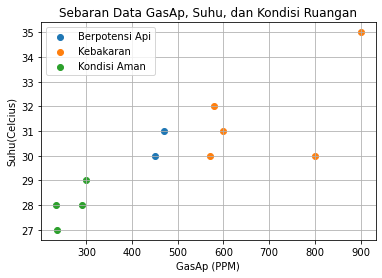

In [2]:
#Visualisasi Data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for KT, d in sensor_df.groupby('KR'):
    ax.scatter(d['GasAp'], d['Suhu'], label=KT)
    
plt.legend(loc='upper left')
plt.title('Sebaran Data GasAp, Suhu, dan Kondisi Ruangan')
plt.xlabel('GasAp (PPM)')
plt.ylabel('Suhu(Celcius)' )
plt.grid(True)
plt.show

In [5]:
#Klasifikasi dengan KNN
#Preprocessing Dataset

import numpy as np

X_train = np.array(sensor_df[['GasAp', 'Suhu']])
Y_train = np.array(sensor_df['KR'])

print(f'X_train:\n{X_train}\n')
print(f'Y_train: {Y_train}')

X_train:
[[234  28]
 [236  27]
 [290  28]
 [300  29]
 [450  30]
 [470  31]
 [570  30]
 [580  32]
 [600  31]
 [800  30]
 [900  35]]

Y_train: ['Kondisi Aman' 'Kondisi Aman' 'Kondisi Aman' 'Kondisi Aman'
 'Berpotensi Api' 'Berpotensi Api' 'Kebakaran' 'Kebakaran' 'Kebakaran'
 'Kebakaran' 'Kebakaran']


In [6]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
Y_train = lb.fit_transform(Y_train)
print(f'Y_train:\n{Y_train}')

Y_train:
[2 2 2 2 0 0 1 1 1 1 1]


In [7]:
Y_train = Y_train.flatten()
print(f'Y_train: {Y_train}')

Y_train: [2 2 2 2 0 0 1 1 1 1 1]


In [8]:
#Training KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
#Prediksi Kondisi Tempat
GasAp = 469
Suhu = 30
X_new = np.array([GasAp, Suhu]).reshape(1, -1)
X_new

array([[469,  30]])

In [10]:
Y_new = model.predict(X_new)
Y_new

array([0])

In [32]:
lb.inverse_transform(Y_new)

array(['Berpotensi Api'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

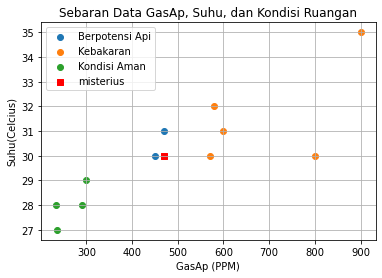

In [11]:
fig, ax = plt.subplots()
for KR, d in sensor_df.groupby('KR'):
    ax.scatter(d['GasAp'], d['Suhu'], label=KR)

plt.scatter(GasAp,
           Suhu,
           marker='s',
           color='red',
           label='misterius')
    
plt.legend(loc='upper left')
plt.title('Sebaran Data GasAp, Suhu, dan Kondisi Ruangan')
plt.xlabel('GasAp (PPM)')
plt.ylabel('Suhu(Celcius)' )
plt.grid(True)
plt.show

In [12]:
#Kalkulasi Distance (Euclidean Distance)
misterius = np.array([GasAp, Suhu])
misterius

array([469,  30])

In [13]:
X_train

array([[234,  28],
       [236,  27],
       [290,  28],
       [300,  29],
       [450,  30],
       [470,  31],
       [570,  30],
       [580,  32],
       [600,  31],
       [800,  30],
       [900,  35]], dtype=int64)

In [17]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[235.00851048419503,
 233.01931250435015,
 179.0111728356641,
 169.00295855398508,
 19.0,
 1.4142135623730951,
 101.0,
 111.01801655587259,
 131.00381673829202,
 331.0,
 431.0290013444571]

In [18]:
sensor_df['jarak'] = data_jarak
sensor_df.sort_values(['jarak'])

,GasAp,Suhu,KR,jarak
5,470,31,Berpotensi Api,1.414214
4,450,30,Berpotensi Api,19.000000
6,570,30,Kebakaran,101.000000
7,580,32,Kebakaran,111.018017
8,600,31,Kebakaran,131.003817
3,300,29,Kondisi Aman,169.002959
2,290,28,Kondisi Aman,179.011173
1,236,27,Kondisi Aman,233.019313
0,234,28,Kondisi Aman,235.008510
9,800,30,Kebakaran,331.000000


In [19]:
#Evaluasi KNN Classification Model
#Testing Set

X_test = np.array([[560, 30],[550, 27], [301, 27], [290, 28]])
Y_test = lb.transform(np.array(['Kebakaran', 'Berpotensi Api', 'Kondisi Aman', 'Kondisi Aman'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'Y_test:\n{Y_test}')

X_test:
[[560  30]
 [550  27]
 [301  27]
 [290  28]]

Y_test:
[1 0 2 2]


In [20]:
#Prediksi Terhadap Testing Set
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 2, 2])

In [21]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.75


In [22]:
#Precision
from sklearn.metrics import precision_score
prec = precision_score(Y_test, Y_pred, average='micro')
print(f'Precision (micro): {prec}')

Precision (micro): 0.75


In [45]:
#Recall
from sklearn.metrics import recall_score
rec = recall_score(Y_test, Y_pred, average='micro')
print(f'Recall (micro): {rec}')

Recall (micro): 0.75


In [23]:
#F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, Y_pred, average='micro')
print(f'F1-score (micro): {f1}')

F1-score (micro): 0.75


In [48]:
#Classification Report
from sklearn.metrics import classification_report
cls_report = classification_report(Y_test, Y_pred)
print(f'classification Report:\n{cls_report}')

classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



C:\Users\FIKRI HAIKAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FIKRI HAIKAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FIKRI HAIKAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Matthew Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(Y_test, Y_pred)
print(f'MCC: {mcc}')

MCC: 0.6708203932499369
